# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [16]:
import numpy as np
#1
affitti = np.array([720, 980, 650, 1200], dtype=float)

#2
spesa = affitti.sum()
print("Spesa totale iniziale:", spesa)

#3
affitti[affitti == 1200] *= 1.12 #considero il 112%
print("Affitti dopo aumento 12%", affitti)
#controllo se appare 1344,00 euro
print(affitti)

spesa_post_1200 = affitti.sum()

#4 considero il 100% -10% --> 90%
affitti[affitti == 650] *=0.90
print("Affitti dopo sconto del 10%", affitti)

#5 
affitti[(affitti == 720) | (affitti == 980)] *= 1.05

print("Affitti finali", affitti)

#6
spesa_finale = affitti.sum()
print("Spesa totale finale:", spesa_finale)

#quanto ha influito l’aumento dell’affitto più alto sulla spesa complessiva?

impatto_1200 = spesa_post_1200 - spesa
print("Impatto dell'aumento del canone da 1200 euro:", impatto_1200)


Spesa totale iniziale: 3550.0
Affitti dopo aumento 12% [ 720.  980.  650. 1344.]
[ 720.  980.  650. 1344.]
Affitti dopo sconto del 10% [ 720.  980.  585. 1344.]
Affitti finali [ 756. 1029.  585. 1344.]
Spesa totale finale: 3714.0
Impatto dell'aumento del canone da 1200 euro: 144.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#1
def random_walk(n_passi, N):
    #genero i passi casuali con p=0.5
    passi = np.random.choice([-1, 1], size = (N, n_passi))
    #somma dei passi fatti da tutti i camminatori fino a quel momento
    posizione = np.cumsum(passi, axis = 1) #lavora sulle righe
    
    #vogliamo media e std degli N camminatori
    media_posizione = posizione.mean(axis=0) #lavora sulle colonne 
    std_posizione = posizione.std(axis=0)

    return media_posizione, std_posizione
#verifico che funzioni
passi = 100
camminatori = 3

media_pos, std_pos = random_walk(passi, camminatori)


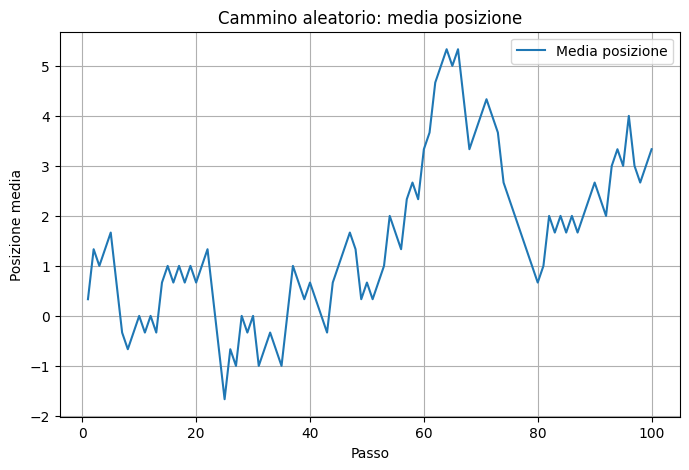

In [27]:
#2
#plot della media della posizione (calcolata con 100 passi) quindi con media_pos
plt.figure(figsize=(8, 5))
plt.plot(range(1, passi+1), media_pos, label='Media posizione')
plt.xlabel('Passo')
plt.ylabel('Posizione media')
plt.title('Cammino aleatorio: media posizione')
plt.grid(True)
plt.legend()
plt.show()

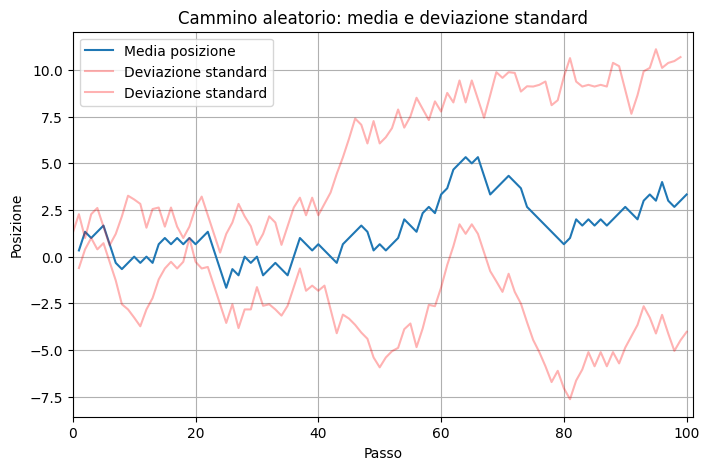

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, passi+1), media_pos, label='Media posizione')
plt.plot(range(1, passi+1), media_pos - std_pos, media_pos + std_pos, color='red', alpha=0.3, label='Deviazione standard')
plt.xlabel('Passo')
plt.ylabel('Posizione')
plt.xlim(0, 101)
plt.title('Cammino aleatorio: media e deviazione standard')
plt.grid(True)
plt.legend()
plt.show()

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [37]:
np.random.seed(42)

#genero i dati che andrò a inserire nell'array a 
a = np.random.normal(loc=0, scale=1, size=(5, 9))
print("Array a:\n", a)

#per ogni riga, seleziono il numero più vicino a 0.1
vicino = []
for riga in a:
    indice = np.argmin(np.abs(riga - 0.1))
    num_vicino = riga[indice]
    #(riga - 0.1) perchè espande su ogni elemento di riga in automatico
    vicino.append(num_vicino)

vicino = np.array(vicino)
print("Elemento più vicino a 0.1 per ogni riga:", vicino)


Array a:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]
Elemento più vicino a 0.1 per ogni riga: [-0.1382643   0.24196227  0.11092259 -0.01349722  0.17136828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


#1 
top_10_fare = df.sort_values (by='Fare', ascending=False).head(10)
print(top_10_fare)

     PassengerId  Survived  Pclass  \
679          680         1       1   
258          259         1       1   
737          738         1       1   
88            89         1       1   
438          439         0       1   
341          342         1       1   
27            28         0       1   
742          743         1       1   
311          312         1       1   
299          300         1       1   

                                                Name     Sex   Age  SibSp  \
679               Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
258                                 Ward, Miss. Anna  female  35.0      0   
737                           Lesurer, Mr. Gustave J    male  35.0      0   
88                        Fortune, Miss. Mabel Helen  female  23.0      3   
438                                Fortune, Mr. Mark    male  64.0      1   
341                   Fortune, Miss. Alice Elizabeth  female  24.0      3   
27                    Fortune, Mr. Charles

In [54]:
#2
media_age = df['Age'].mean()
media_fare = df['Fare'].mean()
media_sibsp = df['SibSp'].mean()

print("Età media:", media_age)
print("Tariffa media:", media_fare)
print("SibSp medio:", media_sibsp)

Età media: 29.69911764705882
Tariffa media: 32.204207968574636
SibSp medio: 0.5230078563411896


In [57]:
#3
#per evitare la divisione per zero sostituisco 0 con Nan
df['Fare'] = df['Fare'].replace(0, np.nan)

df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Family_index'] = df['Family_size'] / df['Fare']

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_index
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.275862
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.028057
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.126183
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.037665
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.124224


In [61]:
#4 
#passeggero con valore massimo di family_index
indice = df['Family_index'].idxmax()
riga = df.loc[indice] #accedo alla riga di indice 
print(riga)

PassengerId                                  69
Survived                                      1
Pclass                                        3
Name            Andersson, Miss. Erna Alexandra
Sex                                      female
Age                                        17.0
SibSp                                         4
Parch                                         2
Ticket                                  3101281
Fare                                      7.925
Cabin                                       NaN
Embarked                                      S
Family_size                                   7
Family_index                           0.883281
Name: 68, dtype: object


In [66]:
#5 
#passeggeri con Fare > 100
passeggeri = df[df['Fare']>100]
passeggeri.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_index
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,6,0.022814
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C,2,0.013650
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S,6,0.022814
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C,2,0.008080
195,196,1,1,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.5208,B80,C,1,0.006825


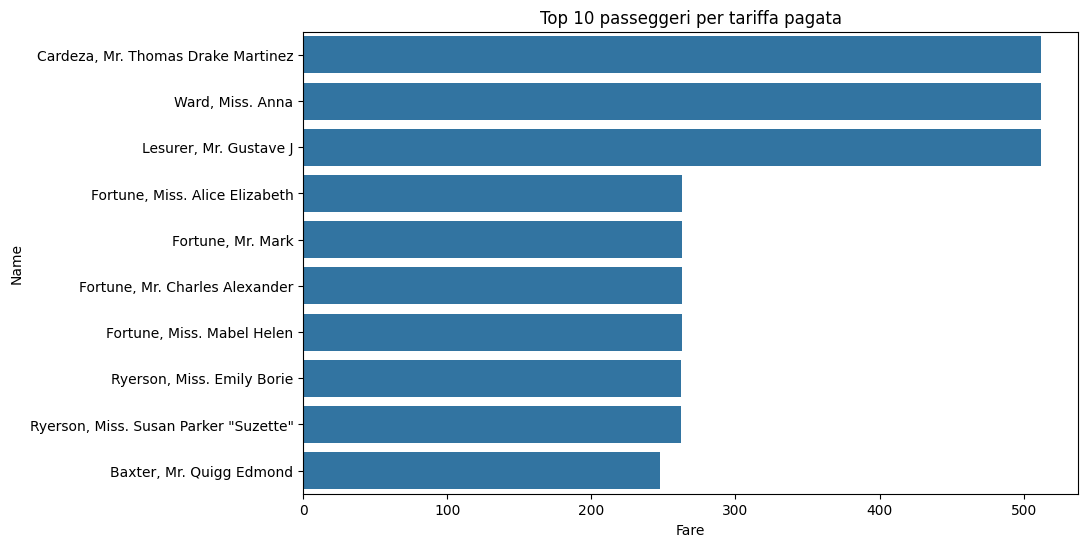

In [79]:
#6
#10 passeggeri che hanno pagato di piu
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
top10_passeggeri = df.sort_values(by='Fare', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Fare', y='Name', data=top10_passeggeri)
plt.title('Top 10 passeggeri per tariffa pagata')
plt.xlabel('Fare')
plt.ylabel('Name')
plt.show()

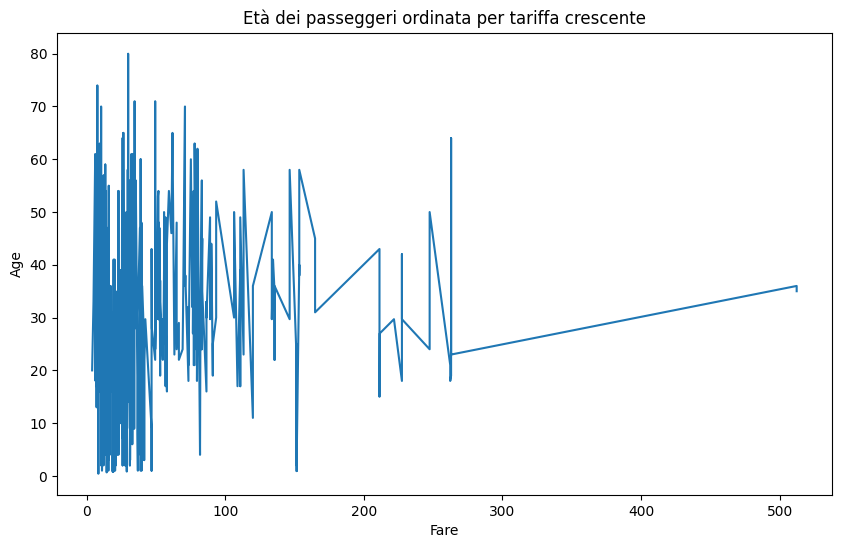

In [85]:
#7
#Crea un grafico a linee dell’età (Age), 
#ordinando i passeggeri per tariffa (Fare) crescente.
#mi assicuro che non ci siano valori mancanti
df['Age'] = df['Age'].fillna(df['Age'].mean())

#modifico il dataframe per tariffa crescente
df_sorted = df.sort_values(by='Fare')
#altrimenti troppi punti
df_sample = df_sorted.sample(100, random_state=1)

plt.figure(figsize=(10,6))
plt.plot(df_sorted['Fare'], df_sorted['Age'])
plt.title('Età dei passeggeri ordinata per tariffa crescente')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importo il dataset
ds = sns.load_dataset("penguins")
ds.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [89]:
#1
ds.shape


(344, 7)

In [91]:
#2
#Controlla quanti valori mancanti ci sono per colonna
ds.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [99]:
#3
#Riempi i valori mancanti nella colonna sex con il valore più frequente.
moda = ds['sex'].mode()[0]

ds['sex'] = ds['sex'].fillna(moda)
#verifichiamo che non ci siano valori mancanti
ds['sex'].isnull().sum()

np.int64(0)

In [ ]:
#4
#Rimuovi le righe in cui il valore body_mass_g è mancante.
ds_senza_nan = ds.dropna(subset=['body_mass_g'])
ds_senza_nan['body_mass_g']


0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

In [106]:
#5
#Controlla se ci sono righe duplicate.
duplicati = ds.duplicated().sum()
print("Numero di righe duplicate:", duplicati)

Numero di righe duplicate: 0


In [117]:
#6
#Calcola la massa corporea media (body_mass_g) per ogni specie (species). 
#Se ci sono valori mancanti in body_mass_g, riempili con la media della specie
#SBAGLIATO
#riempio i valori mancanti con la media globale dei pinguini 
#ds['body_mass_g'] = ds['body_mass_g'].fillna(ds['body_mass_g'].mean())

#calcolo la media per ogni specie CON NAN
#raggruppo per specie
grouped = ds.groupby('species')
#gestisco i valori mancanti
ds['body_mass_g'] = grouped['body_mass_g'].transform(lambda x: x.fillna(x.mean()))

massa_media_senzanan = grouped['body_mass_g'].mean()

print("Massa corporea media per specie:\n", massa_media_senzanan)

Massa corporea media per specie:
 species
Adelie       3703.958910
Chinstrap    3733.088235
Gentoo       5068.965761
Name: body_mass_g, dtype: float64


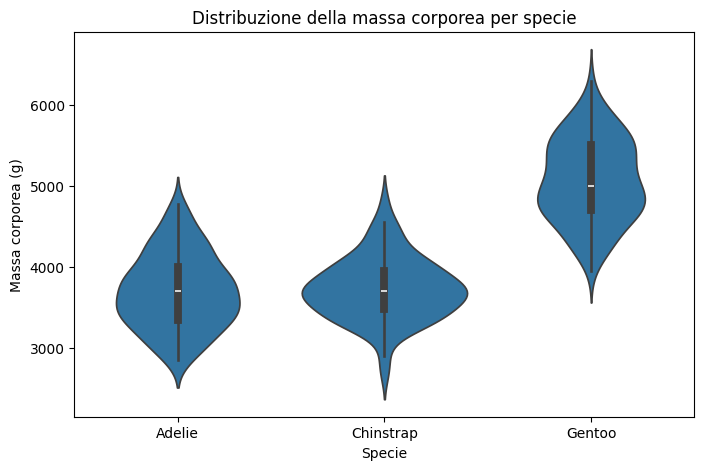

In [124]:
#7
#Visualizza la distribuzione della massa corporea (body_mass_g) per specie.
plt.figure(figsize=(8,5))
sns.violinplot(x='species', y='body_mass_g', data=ds)
plt.title("Distribuzione della massa corporea per specie")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.show()



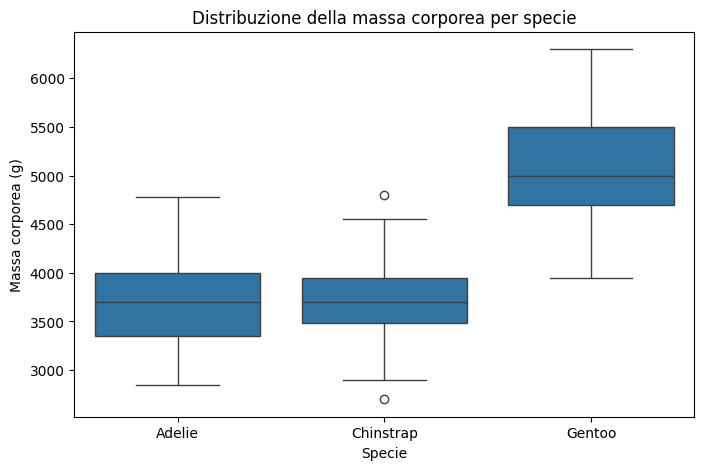

In [123]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='body_mass_g', data=ds)
plt.title("Distribuzione della massa corporea per specie")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.show()

<Figure size 800x500 with 0 Axes>

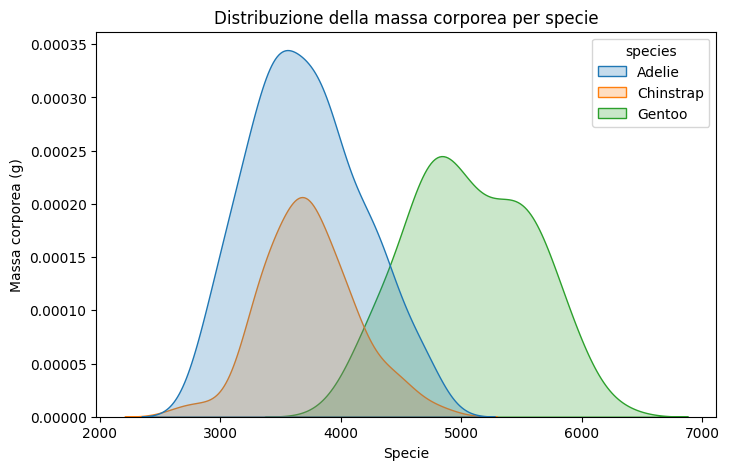

In [ ]:
#kernel density estimate richiede solo variabili numeriche 
#utilizza hue per separare le specie

plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=ds,
    x='body_mass_g',
    hue='species',
    fill=True
)

plt.title("Distribuzione della massa corporea per specie")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.show()

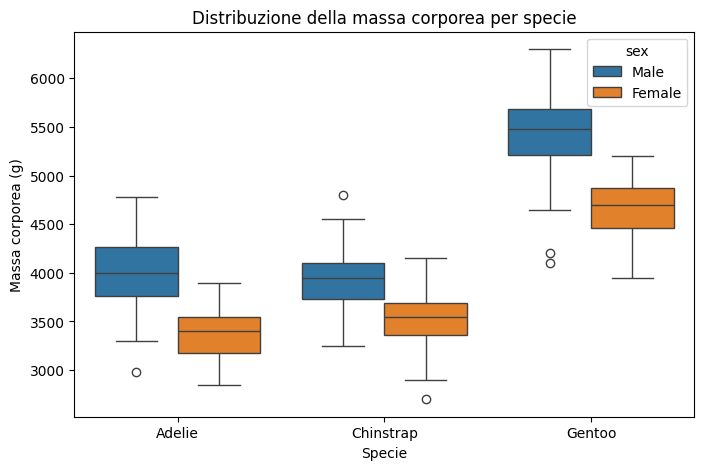

In [129]:
#8
#Visualizza la distribuzione della massa corporea per specie, 
#dividendo per sesso (sex) e mostrandoli a confronto.
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=ds)
plt.title("Distribuzione della massa corporea per specie")
plt.xlabel("Specie")
plt.ylabel("Massa corporea (g)")
plt.show()

## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


y = 2.96949946536183 * x + 1.98335583850114


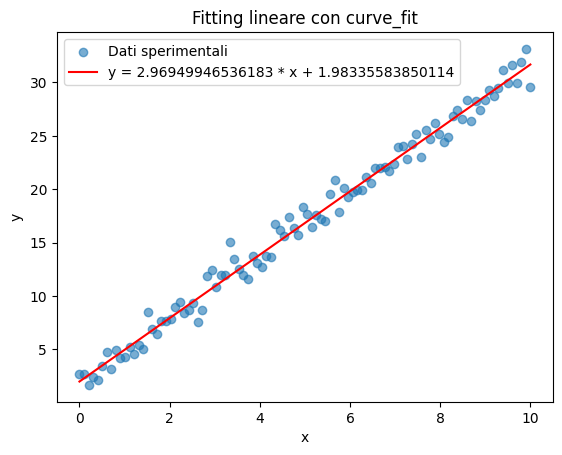

In [ ]:
from scipy.optimize import curve_fit

x = np.linspace(0, 10, 100) #x è un array di 100 numeri da 0 a 10
y = 3 * x + 2 + np.random.normal(0, 1, 100)

#funzione richiesta
def fit_line(x, y):

    def retta(x, a, b):
        return a * x + b 

    #esegui il fitting
    #ignoro la matrice di covarianza
    params, _ = curve_fit(retta, x, y)

    #estraggo i parametri
    a, b = params
    #creo la stringa
    description = "y = {} * x + {}".format(a, b)
    #f"y = {a:.2f} * x + {b:.2f}" controlla i decimali

    #ritorno una tupla contenente i 2 parametri e la stringa
    return a, b, description

#invoco la funzione e salvo la tupla nelle varie variabili (assegnamento multiplo)
a, b, desc = fit_line(x, y)
print(desc)

# Valori della retta fittata: python prende in automatico 
# ogni valore dell'array x e lo plotta sull'asse delle y 
y_fit = a * x + b

#y sono i dati rumorosi
#y_fit sono i valori perfetti della retta stimata dalla funzione

# Plot
plt.scatter(x, y, label="Dati sperimentali", alpha=0.6)

plt.plot(x, y_fit, color="red", label=desc) #label è il nome che compare in legenda
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitting lineare con curve_fit")
plt.show()
